In [47]:
# importing pandas
import pandas as pd

In [48]:
# Loading the given data
df = pd.read_csv('/content/drive/MyDrive/owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date'])

In [49]:
# Cleaning the data as it had some irregularities
df = df[df.location != 'World']
df = df[df.location != 'Europe']
df = df[df.location != 'Africa']
df = df[df.location != 'North America']
df = df[df.location != 'Asia']
df = df[df.location != 'South America']
df = df[df.location != 'European Union']

In [50]:
df1 = df.copy()

#**TASK 1: Finding countries with most number of deaths and cases**

In [51]:
# Grouping by location
df1 = df1.groupby('location').sum()

In [52]:
df1.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,23934815.0,145996.0,144450.417,958484.0,6615.0,6464.991,6.148429e+05,3750.392,3710.683,24621.760,169.928,166.067,518.30,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,17640347.0,10086415.0,2368962.0,6874.0,1256269.0,45.33,25.93,6.09,32287.0,20843.08,2.032059e+10,28408.284,9709.2,1347.282,697.914,941681.214,0.0,311649.138,5005.98,0.0,0.0,19703.412,261.00,33841.26,266.742,0.00
Albania,27854884.0,132999.0,132891.428,525686.0,2457.0,2455.882,9.679229e+06,46215.498,46178.132,182669.404,853.705,853.393,499.96,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,737014.0,101667859.0,35328.322,256.105,728991.0,253.302,77.223,8901.1,65491739.0,30737014.0,20508508.0,808347.0,1107462.0,2275.74,1068.06,712.63,384815.0,30954.02,1.499334e+09,54637.791,19798.0,6870.948,4503.003,6149587.551,573.1,158485.595,5251.68,3699.1,26675.2,0.000,1505.69,40934.97,414.195,494.34
Algeria,36365515.0,168668.0,163891.992,1062733.0,4189.0,4097.141,8.292965e+05,3846.383,3737.475,24235.061,95.497,93.423,524.77,10254.0,233.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,3496309.0,3496309.0,724812.0,30.0,3363814.0,7.97,7.97,1.65,76712.0,35179.26,2.284639e+10,9038.308,15161.1,3235.931,2009.497,7249110.119,260.5,145027.644,3506.33,364.7,15838.4,43629.061,989.90,40054.48,389.708,0.00
Andorra,3234889.0,14655.0,14556.162,39847.0,127.0,127.026,4.186746e+07,189671.897,188392.445,515718.629,1643.664,1643.730,465.93,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5447219.0,70500.473,0.000,79936.0,1034.571,16.464,3298.9,661827.0,420935.0,179434.0,4802.0,76689.0,856.56,544.80,232.26,992545.0,24261.03,3.979148e+07,84333.825,0.0,0.000,0.000,0.000,0.0,56204.525,4104.55,14935.0,19467.0,0.000,0.00,43120.95,447.020,401.21
Angola,7119065.0,42486.0,41985.291,170801.0,1003.0,990.728,2.166070e+05,1292.690,1277.450,5196.866,30.490,30.148,437.44,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,18004847.0,12642131.0,5362716.0,0.0,1580465.0,54.79,38.48,16.32,48098.0,32440.62,1.633454e+10,11873.330,8349.6,1195.285,676.914,2892289.015,0.0,137194.365,1958.18,0.0,0.0,13252.008,0.00,30391.55,288.757,0.00


In [53]:
# Grouping by location shows us the total cases in new_columns
df1.drop(['total_cases', 'total_deaths'], axis = 1, inplace=True)

In [54]:
df1.rename({'new_cases': 'total_cases', 'new_deaths': 'total_deaths'}, axis=1, inplace=True)

In [57]:
# Checking for null values
df1.isnull().sum()

total_cases                              0
new_cases_smoothed                       0
total_deaths                             0
new_deaths_smoothed                      0
total_cases_per_million                  0
new_cases_per_million                    0
new_cases_smoothed_per_million           0
total_deaths_per_million                 0
new_deaths_per_million                   0
new_deaths_smoothed_per_million          0
reproduction_rate                        0
icu_patients                             0
icu_patients_per_million                 0
hosp_patients                            0
hosp_patients_per_million                0
weekly_icu_admissions                    0
weekly_icu_admissions_per_million        0
weekly_hosp_admissions                   0
weekly_hosp_admissions_per_million       0
new_tests                                0
total_tests                              0
total_tests_per_thousand                 0
new_tests_per_thousand                   0
new_tests_s

In [58]:
# Getting the maximun value of each case
df1.idxmax()

total_cases                                             United States
new_cases_smoothed                                      United States
total_deaths                                            United States
new_deaths_smoothed                                     United States
total_cases_per_million                                       Andorra
new_cases_per_million                                         Andorra
new_cases_smoothed_per_million                                Andorra
total_deaths_per_million                                         Peru
new_deaths_per_million                                           Peru
new_deaths_smoothed_per_million                                  Peru
reproduction_rate                                               Spain
icu_patients                                            United States
icu_patients_per_million                                      Czechia
hosp_patients                                           United States
hosp_patients_per_mi

United States seems to have them most number of cases and deaths


In [60]:
# Finding the most deaths and most cases
most_cases = df1['total_cases'].max()
most_deaths = df1['total_deaths'].max()
print('The most number of cases are:', most_cases, 'in the United States')
print('The most number of deaths are:', most_deaths, 'in the United States')

The most number of cases are: 34750859.0 in the United States
The most number of deaths are: 612122.0 in the United States


#**TASK 2: Finding the minimum number of cases and deaths**

In [62]:
df1.idxmin()

total_cases                                                     Anguilla
new_cases_smoothed                                              Anguilla
total_deaths                                                    Anguilla
new_deaths_smoothed                                             Anguilla
total_cases_per_million                                         Anguilla
new_cases_per_million                                           Anguilla
new_cases_smoothed_per_million                                  Anguilla
total_deaths_per_million                                        Anguilla
new_deaths_per_million                                          Anguilla
new_deaths_smoothed_per_million                                 Anguilla
reproduction_rate                                               Anguilla
icu_patients                                                 Afghanistan
icu_patients_per_million                                     Afghanistan
hosp_patients                                      

Anguilla seems to have minimum number of cases and deaths

In [63]:
# Finding the minimum deaths and minimum cases
minimum_cases = df1['total_cases'].min()
minimum_deaths = df1['total_deaths'].min()
print('The minimum number of cases are:', minimum_cases, 'in Anguilla')
print('The minimum number of deaths are:', minimum_deaths, 'in Anguilla')

The minimum number of cases are: 0.0 in Anguilla
The minimum number of deaths are: 0.0 in Anguilla


#**TASK 3: Finding the total number of deaths and cases in India**


In [64]:
# Filtering the Dataframe
task3_df = df1[df1.index == 'India']

In [76]:
print('Total number of cases in India are:', task3_df['total_cases'][0])
print('Total number of death in India are:', task3_df['total_deaths'][0])

Total number of cases in India are: 31572344.0
Total number of death in India are: 423217.0


#**Task 5: Covid 19 cases starting from 1st Oct 2020 (Done before the fbprophet task)**

In [77]:
# Renaming our columns for fbprophet
df.rename({'date': 'ds', 'total_cases': 'y'}, axis=1, inplace=True)

In [78]:
# Imputing null values
df = df.fillna(0)

In [79]:
# Grouping data by date
df = df.groupby(pd.Grouper(key='ds',freq='D')).sum()

In [81]:
df.tail()

,y,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
ds,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-07-25,194255037.0,439772.0,537905.291,4161123.0,6970.0,8712.716,7380674.243,16435.976,19726.068,131222.919,262.659,243.201,196.79,2801.0,144.092,18324.0,1019.753,815.666,100.782,13531.66,743.552,4954036.0,1.884759e+09,79052.448,278.930,7492815.0,393.801,7.722,8242.1,3.797266e+09,1.448180e+09,821715179.0,22365899.0,32201616.0,6683.82,3838.98,2769.88,698624.0,3805.07,7.801200e+09,90228.784,5730.2,1613.838,1023.944,3587313.046,1731.6,49394.368,1627.47,1572.0,4714.6,4715.599,507.678,14838.68,134.997,0.0
2021-07-26,194793811.0,538774.0,543867.004,4169008.0,7885.0,8804.434,7406017.270,25343.023,20008.055,131515.827,292.911,246.074,197.27,1120.0,22.904,6677.0,130.938,0.000,0.000,0.00,0.000,5145509.0,2.076866e+09,86015.477,306.230,7282501.0,386.752,7.115,8458.4,3.835946e+09,1.446458e+09,832089698.0,37741047.0,33450308.0,7347.58,4187.14,3067.34,667168.0,2933.80,7.801099e+09,90228.784,5730.2,1613.838,1023.944,3587313.046,1731.6,49394.368,1627.47,1572.0,4714.6,4715.599,507.678,14838.68,134.997,0.0
2021-07-27,195410702.0,616891.0,555472.855,4179040.0,10032.0,8506.860,7426581.834,20564.566,20057.622,131768.318,252.483,250.637,197.76,1146.0,23.282,6817.0,136.864,0.000,0.000,0.00,0.000,5256358.0,1.875758e+09,86001.131,314.359,6589049.0,364.854,7.024,8263.4,3.739732e+09,1.392338e+09,798202541.0,38254888.0,34390708.0,7663.35,4437.63,3266.67,626477.0,911.56,7.801065e+09,86771.684,5730.2,1613.838,1023.944,3587313.046,1731.6,49394.368,1627.47,1572.0,4714.6,4715.599,507.678,14758.75,134.997,0.0
2021-07-28,196048644.0,637942.0,565788.416,4188739.0,9699.0,8629.005,7448135.247,21553.414,20343.927,132009.637,241.320,250.427,0.00,1141.0,23.090,6810.0,137.758,0.000,0.000,0.00,0.000,4990093.0,1.288390e+09,67912.912,307.647,5789566.0,343.730,6.066,8016.2,3.824066e+09,1.419869e+09,820120197.0,37903628.0,35300860.0,6951.43,3935.03,2960.91,519898.0,490.73,7.800382e+09,85846.540,5641.8,1590.289,1008.830,3568991.790,1731.6,49166.878,1541.99,1517.2,4633.3,4715.599,500.078,14472.67,134.272,0.0
2021-07-29,196708341.0,659697.0,579276.280,4200308.0,11569.0,9013.717,7473048.279,24913.029,20529.154,132385.476,375.842,263.992,0.00,287.0,10.229,785.0,50.270,0.000,0.000,0.00,0.000,3366958.0,1.093299e+09,45208.598,202.801,4020100.0,235.026,4.301,8179.6,3.578051e+09,1.267837e+09,701264474.0,39962318.0,33744195.0,4787.88,2770.30,2052.25,375285.0,359.25,7.800017e+09,85300.716,5600.1,1573.922,998.762,3568991.790,1731.6,49166.878,1530.37,1517.2,4633.3,4715.599,500.078,14231.72,134.272,0.0


In [82]:
df['ds'] = df.index

In [88]:
# Filtering the data from October 2020
df_oct = df[df['ds'] > '2020-9-30']

In [89]:
df_oct.head()

,y,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,ds
ds,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-10-01,34361285.0,318342.0,293372.136,1074251.0,8805.0,5828.289,992989.015,9272.354,9044.084,25101.612,188.668,136.293,176.29,13625.0,245.341,61823.0,1605.155,0.000,0.000,0.000,0.000,4949973.0,422923116.0,14395.001,144.646,4624278.0,145.481,8.152,10826.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9311.14,7.797653e+09,63208.973,5407.6,1528.827,973.49,3358003.942,1677.3,46165.087,1398.25,1461.8,4501.8,4571.998,494.078,13488.83,130.427,0.00,2020-10-01
2020-10-02,34659269.0,297984.0,288654.425,1079294.0,5043.0,5699.144,1004532.403,11543.386,9094.725,25227.222,125.601,131.910,177.81,13704.0,252.122,62157.0,1621.339,0.000,0.000,0.000,0.000,4191344.0,365822733.0,13709.263,140.456,4585883.0,145.531,8.149,10898.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9307.92,7.797653e+09,63208.973,5407.6,1528.827,973.49,3358003.942,1677.3,46165.087,1398.25,1461.8,4501.8,4571.998,494.078,13488.83,130.427,0.00,2020-10-02
2020-10-03,34991423.0,332154.0,294861.573,1084746.0,5452.0,5682.726,1013494.546,8962.154,9274.292,25339.073,111.859,131.137,179.33,12274.0,225.813,51977.0,1410.357,0.000,0.000,0.000,0.000,3685353.0,406542676.0,13766.411,118.168,4570882.0,145.933,8.248,11122.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9322.73,7.797653e+09,63208.973,5407.6,1528.827,973.49,3358003.942,1677.3,46165.087,1398.25,1461.8,4501.8,4571.998,494.078,13488.83,130.427,0.00,2020-10-03
2020-10-04,35252827.0,261404.0,296295.142,1088748.0,4002.0,5709.434,1021911.471,8416.929,9515.808,25458.077,119.008,135.472,180.78,12541.0,231.126,53595.0,1506.245,2919.529,205.249,61084.856,1737.163,3488831.0,441266953.0,14747.577,98.002,4604255.0,145.899,8.438,10656.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9300.51,7.797653e+09,63208.973,5407.6,1528.827,973.49,3358003.942,1677.3,46165.087,1398.25,1461.8,4501.8,4571.998,494.078,13488.83,130.427,512.04,2020-10-04
2020-10-05,35553459.0,300632.0,302812.429,1095748.0,7000.0,6134.287,1034772.915,12861.438,10081.409,25604.857,146.784,139.671,181.89,14562.0,277.722,67122.0,1816.811,0.000,0.000,0.000,0.000,3779249.0,424308856.0,14913.491,128.197,4689579.0,147.644,8.283,10722.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9287.10,7.797653e+09,63208.973,5407.6,1528.827,973.49,3358003.942,1677.3,46165.087,1398.25,1461.8,4501.8,4571.998,494.078,13488.83,130.427,0.00,2020-10-05


In [90]:
# Importing Libraries
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

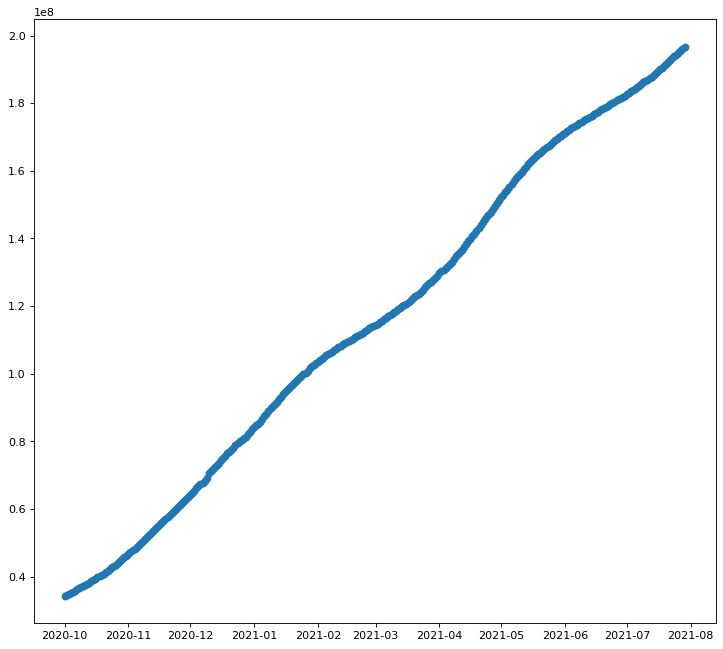

In [91]:
# Plotting the trend
figure(figsize=(11, 10), dpi=80)
dates = df_oct['ds']
cases = df_oct['y']
plt.plot_date(dates, cases, linestyle='solid')

#**TASK 4: Using FbProphet to forecast cases for next 30 days**

In [13]:
df.shape

(576, 56)

**Finding correlation between diffrent number on features of which the total number of cases might be dependent** 

In [92]:
df[['y', 'reproduction_rate']].corr()

,y,reproduction_rate
y,1.000000,0.462452
reproduction_rate,0.462452,1.000000


In [93]:
df[['y', 'new_deaths']].corr()

,y,new_deaths
y,1.000000,0.687357
new_deaths,0.687357,1.000000


In [94]:
df[['y', 'new_tests']].corr()

,y,new_tests
y,1.000000,0.867797
new_tests,0.867797,1.000000


In [95]:
df[['y', 'positive_rate']].corr()

,y,positive_rate
y,1.000000,0.470595
positive_rate,0.470595,1.000000


In [96]:
df[['y', 'new_vaccinations']].corr()

,y,new_vaccinations
y,1.000000,0.856021
new_vaccinations,0.856021,1.000000


In [97]:
df[['y', 'population']].corr()

,y,population
y,1.000000,0.335904
population,0.335904,1.000000


In [99]:
# Importing Prophet
from fbprophet import Prophet

In [100]:
# Initializing the model
m = Prophet(interval_width=0.90,yearly_seasonality=True)

In [101]:
# Adding features to the model on which our target variable totla_cases depends
m.add_regressor('reproduction_rate', standardize=False)
m.add_regressor('new_tests', standardize=False)
m.add_regressor('positive_rate', standardize=False)
m.add_regressor('new_vaccinations', standardize=False)
m.add_regressor('population', standardize=False)
m.add_regressor('new_deaths', standardize=False)

In [102]:
# Fitting the model
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [103]:
# Making new DataFrame containing next 30 days
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
601,2021-08-24
602,2021-08-25
603,2021-08-26
604,2021-08-27
605,2021-08-28


In [104]:
# Adding the features to that DataFrame
future['reproduction_rate'] = df['reproduction_rate']
future['new_tests'] = df['new_tests']
future['positive_rate'] = df['positive_rate']
future['new_vaccinations'] = df['new_vaccinations']
future['population'] = df['population']
future['new_deaths'] = df['new_deaths']
future = future.fillna(0)

In [105]:
# Predicicting the cases
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
601,2021-08-24,2.096784e+08,2.071574e+08,2.122968e+08
602,2021-08-25,2.102191e+08,2.075195e+08,2.129957e+08
603,2021-08-26,2.107699e+08,2.079207e+08,2.136382e+08
604,2021-08-27,2.113162e+08,2.082926e+08,2.143756e+08
605,2021-08-28,2.118303e+08,2.086417e+08,2.150467e+08


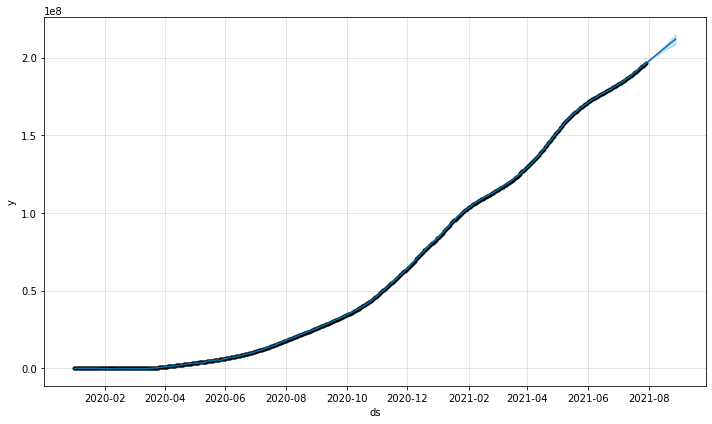

In [106]:
# Plot of the prediction
fig1 = m.plot(forecast)

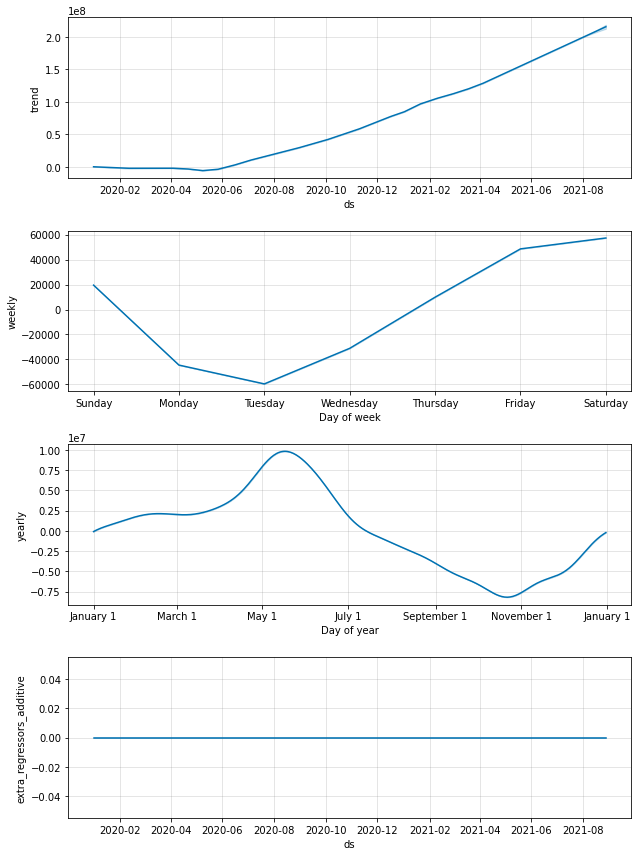

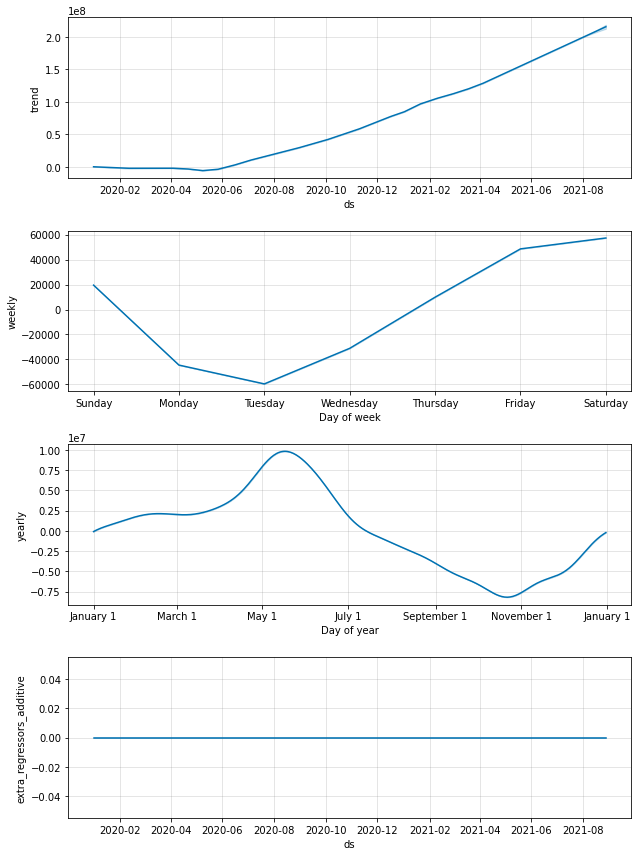

In [107]:
m.plot_components(forecast)

1. Trend shows a upward trajectory.
2. There was a dip in cases in November 2020 but after that they started rising again.
3. Cases on Mondays and Tuesdays seem to be lower beacause at many places many testing facilites are closed on sunday and the data on the initial day is from one day before.

In [108]:
# Using cross validation
from fbprophet.diagnostics import cross_validation, performance_metrics
cv_results = cross_validation(model = m, period='30 days', horizon = '60 days')
cv_results.head()

INFO:fbprophet:Making 5 forecasts with cutoffs between 2021-01-30 00:00:00 and 2021-05-30 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-01-31,1.030764e+08,1.029450e+08,1.032140e+08,103061745.0,2021-01-30
1,2021-02-01,1.035187e+08,1.033838e+08,1.036500e+08,103508402.0,2021-01-30
2,2021-02-02,1.039864e+08,1.038453e+08,1.041331e+08,103966450.0,2021-01-30
3,2021-02-03,1.044829e+08,1.043331e+08,1.046249e+08,104488525.0,2021-01-30
4,2021-02-04,1.049936e+08,1.048214e+08,1.051368e+08,104955456.0,2021-01-30


In [109]:
df_p = performance_metrics(cv_results)

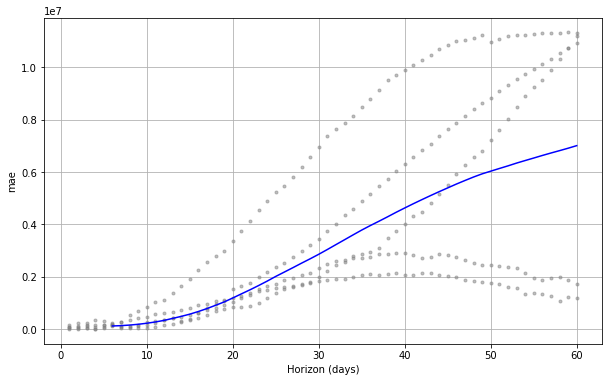

In [111]:
# Checking our model's metrics
from fbprophet.plot import plot_cross_validation_metric
fig2 = plot_cross_validation_metric(cv_results, metric='mae')